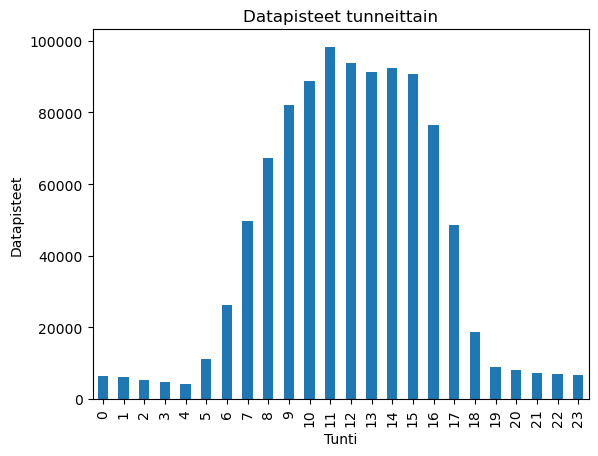

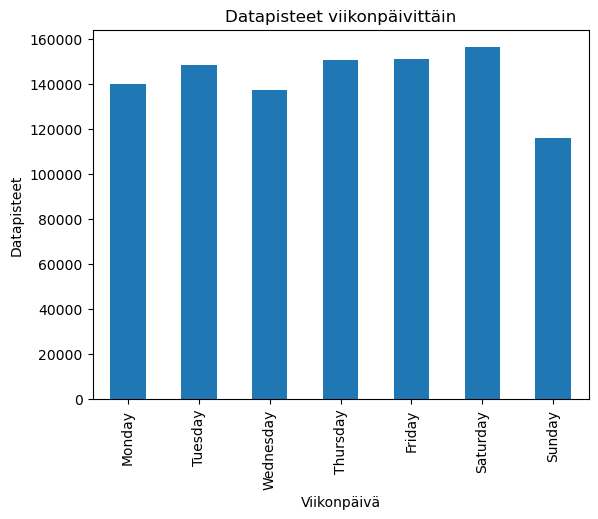

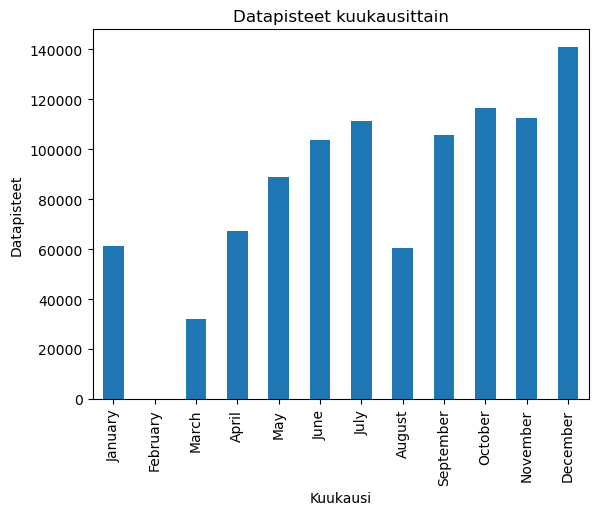

In [3]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

# Tietokantayhteys
from database_connection import create_conn

def get_sensor_data_with_timestamps():
    conn = create_conn()
    #query = "SELECT timestamp, sensor_id FROM SensorData;"
    query = "SELECT timestamp, sensor_id FROM SensorData ORDER BY RAND() LIMIT 1000000;"

    with conn.cursor(pymysql.cursors.DictCursor) as cursor:
        cursor.execute(query)
        result = cursor.fetchall()

    conn.close()

    if result:
        columns = ["timestamp", "sensor_id"]
        df = pd.DataFrame(result, columns=columns)
        return df
    else:
        return pd.DataFrame()

# Ladataan data DataFrameen
df = get_sensor_data_with_timestamps()

# Muutetaan timestamp-sarakkeen tyyppi datetime-tyyppiseksi
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Lisätään uudet sarakkeet: tunti, viikonpäivä ja kuukausi
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['month'] = df['timestamp'].dt.month_name()

# Tunnit
hourly_counts = df.groupby('hour').size()
hourly_counts.plot(kind='bar', title='Datapisteet tunneittain')
plt.xlabel('Tunti')
plt.ylabel('Datapisteet')
plt.show()

# Viikonpäivät
day_of_week_counts = df.groupby('day_of_week').size()
day_of_week_counts = day_of_week_counts.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
day_of_week_counts.plot(kind='bar', title='Datapisteet viikonpäivittäin')
plt.xlabel('Viikonpäivä')
plt.ylabel('Datapisteet')
plt.show()

# Kuukaudet
month_counts = df.groupby('month').size()
month_counts = month_counts.reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
month_counts.plot(kind='bar', title='Datapisteet kuukausittain')
plt.xlabel('Kuukausi')
plt.ylabel('Datapisteet')
plt.show()


Asiakkaalle näkemys "kuumista" tunneista, päivistä ja kuukausista